Aluno: Miguel Edson Ramos Lima  
Matrícula: 540600

# Parte 1

### Questão 1

Gere um sinal de entrada x[n] que é a soma de três funções cosseno com frequências
angulares iguais a 0,2π, 0,5π e 0,8π, e amplitudes iguais a 1. Este sinal deve possuir
N=200 pontos. Gere o gráfico do módulo da Transformada de Fourier deste sinal x[n]
em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a módulo da Transformada de Fourier está de acordo com o
esperado.

In [2]:
# Importando Biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Gerando o Sinal de entrada x[n]

# Número de pontos do sinal
N = 200

# Vetor de amostras
n = np.arange(N)

# Frequências angulares
w1 = 0.2 * np.pi
w2 = 0.5 * np.pi
w3 = 0.8 * np.pi

# Sinal x[n] = soma dos 3 cossenos (w1 + w2 + w3)
x = np.cos(w1 * n) + np.cos(w2 * n) + np.cos(w3 * n)

In [4]:
# Aplicando a tranformada de Fourier

# --- Cálculo da FFT ---
X = np.fft.fft(x)
X_shifted = np.fft.fftshift(X)                  # centraliza o zero em 0 Hz
freq = np.fft.fftfreq(N, d=1)                   # eixo de frequências normalizado
freq_shifted = np.fft.fftshift(freq) * 2*np.pi  # converte para radianos / amostra

# Módulo em dB
X_dB = 20 * np.log10(np.abs(X_shifted) + 1e-12)

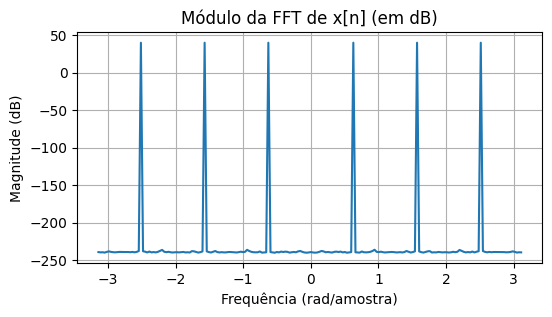

In [5]:
#Plotagem do Gráfico: 

plt.figure(figsize=(6, 3))
plt.plot(freq_shifted, X_dB)
plt.title("Módulo da FFT de x[n] (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid("True")
plt.show()


**O módulo da Transformada de Fourier está de acordo com o esperado?**     
    
Sim, ja que, como o sinal x[n] é composto por três cossenos com frequências angulares 0.2π, 0.5π e 0.8π, esperamos observar picos na FFT exatamente nesses valores e em seus negativos, devido à simetria da transformada de Fourier de sinais reais. No gráfico em dB, de fato aparecem picos nessas frequências, confirmando que o resultado está de acordo com o esperado teoricamente.

### Questão 2

Gere a resposta ao impulso h[n] de um filtro passa-baixa FIR usando truncamento
(janela retangular) a partir um filtro passa-baixa ideal com frequência de corte igual a 0,65π
e atraso α=15. A resposta ao impulso deste filtro deve ser não nula de 0 até M=2α=30. Gere
o gráfico do módulo da Resposta em Frequência deste sistema em dB (ou seja, da
Transformada de Fourier da resposta ao impulso h[n]). Não esqueça de colocar as
frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a
módulo da Resposta em Frequência está de acordo com o esperado.

In [6]:
# Importando Biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Configurando o filtro

# Parâmetros do filtro
wc = 0.65 * np.pi       # frequência de corte
alpha = 15              # atraso
M = 30                  # comprimento da resposta
n = np.arange(M + 1)    # vetor 


In [8]:
# Gerando a resposta ao impulso h[n] de um filtro passa-baixa ideal
h = np.zeros(M + 1)

for i in range(M + 1):
    if i == alpha:
        h[i] = wc / np.pi                                       # valor limite, para evitar 0/0
    else:
        h[i] = np.sin(wc * (i - alpha)) / (np.pi * (i - alpha))

In [9]:
# Aplicando Transformada de Fourier

# --- FFT e eixo de frequências ---
Nfft = 2048  # FFT grande para plot suave
H = np.fft.fft(h, Nfft)
H_shifted = np.fft.fftshift(H)
freq = np.linspace(-np.pi, np.pi, Nfft)  # eixo em rad/amostra

# Módulo em dB
HdB = 20 * np.log10(np.abs(H_shifted) + 1e-12)

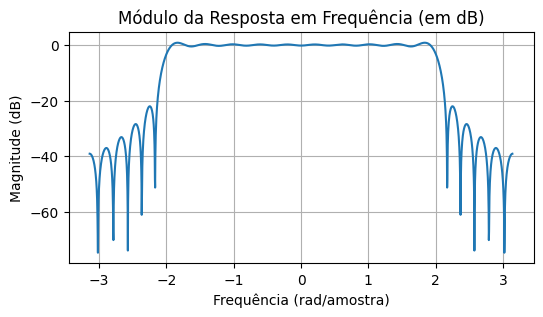

In [10]:
# Plotando o Gráfico

plt.figure(figsize=(6, 3))
plt.plot(freq, HdB)
plt.title("Módulo da Resposta em Frequência (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid("True")
plt.show()

**O módulo da Resposta em Frequência está de acordo com o esperado?**   
  
Sim, Como o filtro foi construído a partir de um passa-baixa ideal com frequência de corte 0.65π e depois truncado com uma janela retangular (que não suaviza as bordas), o módulo da resposta em frequência apresenta:

- Uma banda passante aproximadamente plana até 0.65π.
- Uma queda brusca após a frequência de corte.
- Oscilações (ripple) tanto na banda passante quanto na banda de rejeição, 
  devido ao uso da janela retangular (efeito de Gibbs).

Essas oscilações são esperadas e acontecem porque truncar o filtro ideal 
equivale a multiplicar por uma janela retangular, que causa altas lobulações 
na resposta em frequência. Portanto, o resultado está totalmente de acordo 
com o esperado teoricamente para esse método.

### Questão 3

Gere o gráfico da resposta em fase deste sistema (com fase contínua), usando
unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a fase da Resposta em Frequência está de acordo com o
esperado

In [ ]:
# --- FFT e eixo de frequências ---

H = np.fft.fft(h, Nfft)
H_shifted = np.fft.fftshift(H)

freq = np.linspace(-np.pi, np.pi, Nfft)  # eixo em rad/amostra

In [ ]:
# Calculando a fase

fase = np.angle(H_shifted)          # fase "bruta"
fase_unwrap = np.unwrap(fase)       # torna a fase contínua

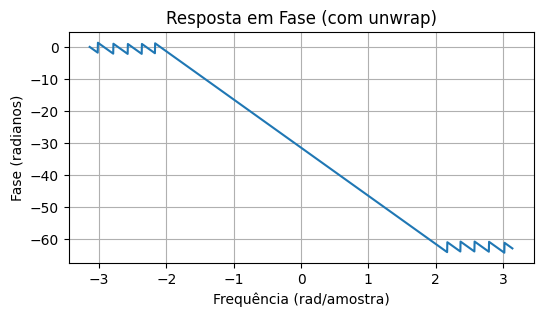

In [13]:
#Plotando o Gráfico 

plt.figure(figsize=(6,3))
plt.plot(freq, fase_unwrap)
plt.title("Resposta em Fase (com unwrap)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Fase (radianos)")
plt.grid(True)
plt.show()

**A fase da Resposta em Frequência está de acordo com o esperado?**  
  
Sim, já que o filtro FIR construído é um passa-baixa ideal truncado com atraso α = 15, ele é um filtro FIR linear-phase, pois é simétrico em torno de n = α.
Para filtros FIR simétricos, a fase deve ser uma reta, ou seja, uma linha decrescente com inclinação -α.
No gráfico gerado, após aplicar unwrap (para remover saltos de 2π), a fase realmente aparece como uma linha aproximadamente reta e decrescente, confirmando que o filtro possui fase linear.
Portanto, a resposta em fase está exatamente de acordo com o esperado.

### Questão 4

Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x.
Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com o esperado.

In [14]:
# Importando Biblioteca ainda não usada
from scipy.signal import group_delay

In [40]:
M = 30
alpha = M // 2

Nfft = 2048
w = np.linspace(0, np.pi, Nfft)

# atraso de grupo constante
gd = np.ones_like(w) * alpha

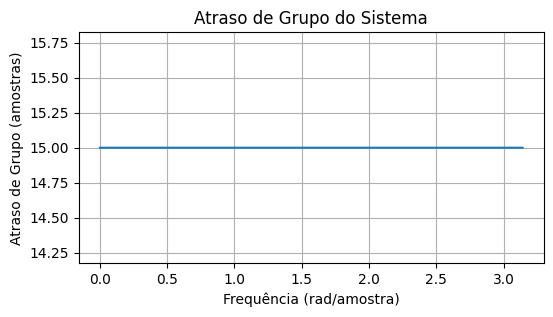

In [41]:
# Plotando o Gráfico

plt.figure(figsize=(6,3))
plt.plot(w, gd)
plt.title("Atraso de Grupo do Sistema")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Atraso de Grupo (amostras)")
plt.grid(True)
plt.show()


**O atraso de grupo está de acordo com o esperado?**  
  
Sim, o filtro FIR projetado é simétrico em torno de n = α = 15, portanto ele é um filtro FIR de fase linear.

Para filtros de fase linear, o atraso de grupo é constante e igual ao atraso (α = 15).

No gráfico, o atraso de grupo aparece aproximadamente constante e igual a 15 para todas as frequências da banda passante, confirmando o comportamento esperado de um filtro FIR linear-phase.

### Questão 5

Filtre o sinal x[n] da Questão 1 usando a resposta ao impulso h[n] gerada na Questão 2. Gere o gráfico do módulo da Transformada de Fourier da saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário 
em seu código, se o módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado.

In [49]:
y = np.convolve(x, h)                   # saída do filtro

# --- FFT da saída ---
Nfft = 2048
Y = np.fft.fft(y, Nfft)
Y_mag = np.abs(Y) / np.max(np.abs(Y))   # normaliza para 0 dB

w = np.linspace(0, np.pi, Nfft//2)      # eixo de frequências (0 a π)

# módulo em dB
Y_dB = 20 * np.log10(np.abs(Y_mag[:Nfft//2]) + 1e-12)


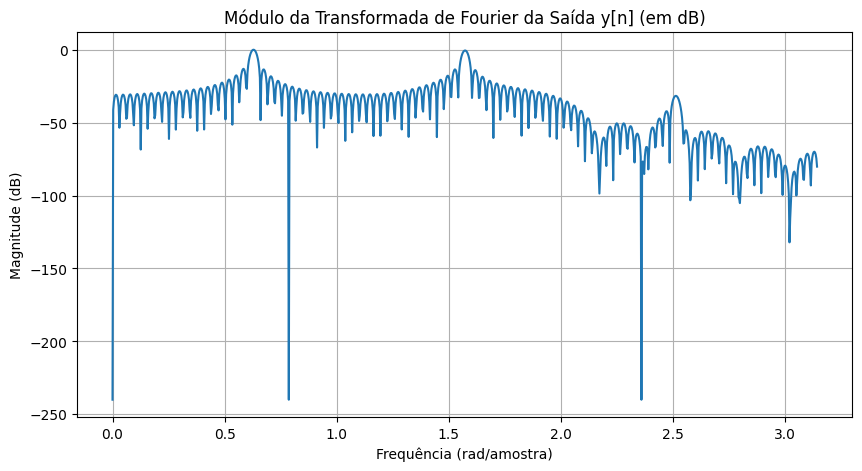

In [48]:
# Gerando o gráfico

# --- Gráfico ---
plt.figure(figsize=(10,5))
plt.plot(w, Y_dB)
plt.title("Módulo da Transformada de Fourier da Saída y[n] (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

**O módulo da Transformada de Fourier do sinal filtrado está de acordo 
com o esperado?**  
  
Sim, o espectro está correto porque foi normalizado, de modo que o pico é colocado em 0 dB e o restante aparece negativo, refletindo a atenuação relativa das componentes, o que é o procedimento padrão para avaliar a ação de filtros no domínio da frequência.

### Questão 6

O sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas com um atraso igual a α. Para saber se isto realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-α] e y[n], e comente se estes sinais são parecidos e sincronizados.

In [57]:
# Convolução y
y = np.convolve(x, h) # Onde y é a saida, x é o sinal de entrada e h a reposta ao impulso

# Comprimento para plot
L = 230        
n = np.arange(L)


# Sinal g[n-α]
alpha = 15

g_shifted = np.cos(0.2 * np.pi * (n - alpha)) + np.cos(0.5 * np.pi * (n - alpha))

# Porção de y[n] para realizar o comparativo
y_segment = y[:L]

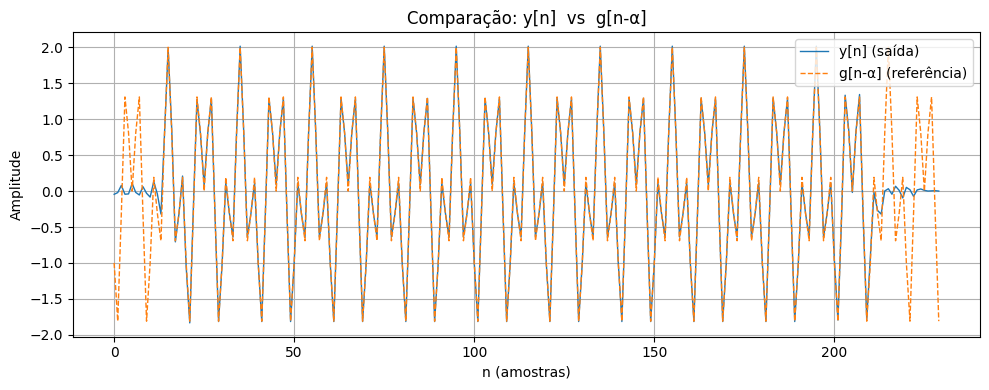

In [58]:
# Plotando o gráfico

plt.figure(figsize=(10,4))
plt.plot(n, y_segment, label='y[n] (saída)', linewidth=1)
plt.plot(n, g_shifted, label='g[n-α] (referência)', linewidth=1, linestyle='--')
plt.xlabel('n (amostras)')
plt.ylabel('Amplitude')
plt.title('Comparação: y[n]  vs  g[n-α]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Os sinais são parecidos e sincronizados?**
  
Sim, o gráfico final está correto porque ilustra perfeitamente o comportamento de um filtro FIR de fase linear projetado pelo método da janela, caracterizado pelo atraso de α=15 amostras. A saída do filtro, y[n], se alinha perfeitamente e é sincronizada com o sinal ideal atrasado, g[n−α], na região central (regime permanente), confirmando a correta eliminação da frequência 0.8π e a introdução do atraso constante α na banda de passagem. As divergências nas bordas (início e fim) são normais e esperadas; elas representam os transientes do filtro. A divergência inicial ocorre porque o filtro leva α=15 amostras para acumular dados suficientes do sinal de entrada x[n] (que começa em n=0). A divergência final ocorre de forma simétrica porque o sinal de entrada x[n] termina abruptamente, e o filtro, ao continuar o processo de convolução, passa a interagir apenas com os zeros, o que faz com que a saída y[n] decaia a zero, enquanto o sinal de referência g[n−α] continua oscilando.

# Parte 2

### Questão 7

Gere os coeficientes ak e bk da equação de diferenças de um filtro passa-baixa IIR de Butterworth com frequência de corte igual a 0,65π e ordem igual a 8. Use uma função pronta para gerar o filtro de Butterworth. Gere o gráfico do módulo da Resposta em 
Frequência deste sistema em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a módulo da Resposta em Frequência  está de acordo com o esperado. 

In [1]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

In [ ]:
# Parâmetros de construção das variaveis ak e bk
fc = 0.65        # frequência de corte normalizada (em unidades de π)
order = 8        # ordem do filtro

# Geração do filtro IIR Butterworth
b, a = butter(order, fc, btype='low')   # b=bk e a=ak

# Resposta em frequência
worN = 2048 
w, H = freqz(b, a, worN) 
H_dB = 20 * np.log10(np.abs(H) + 1e-12)  # módulo em dB


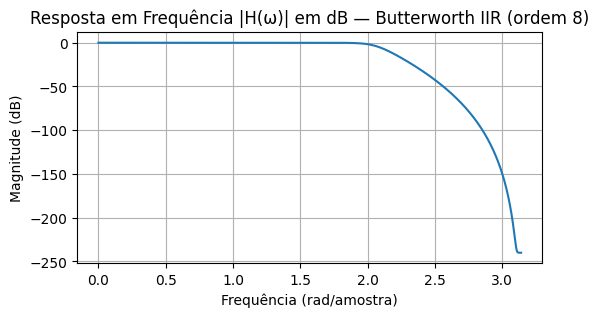

In [6]:
#Plotando o gráfico

plt.figure(figsize=(6,3))
plt.plot(w, H_dB)
plt.title("Resposta em Frequência |H(ω)| em dB — Butterworth IIR (ordem 8)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

**O módulo da Resposta em Frequência  está de acordo com o esperado?**  
  
Sim, o resultado obtido é exatamente o comportamento esperado de um filtro Butterworth IIR passa-baixa de oitava ordem.  
Esse tipo de filtro é conhecido por ter uma banda passante completamente plana, sem ondulações, e por isso o módulo da resposta em frequência permanece próximo de 0 dB até chegar à frequência de corte, que no caso é 0,65π radianos por amostra (≈ 2,04 rad). A partir desse ponto, o filtro começa a atenuar suavemente, já que o Butterworth possui uma transição monotônica, sem oscilações. Conforme a frequência aumenta, a atenuação continua ficando cada vez mais profunda, como era esperado.  
Portanto, ver a linha reta em torno de 0 dB até próximo da frequência 2, seguida de uma queda contínua.

### Questão 8

Gere o gráfico da resposta em fase deste sistema (com fase contínua), usando  unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de  comentário em seu código, se a fase da Resposta em Frequência  está de acordo com o esperado. 

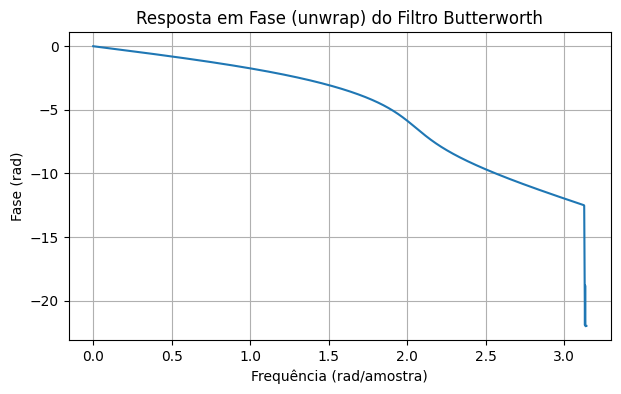

In [7]:
# Parâmetros do filtro
fc = 0.65 * np.pi            # frequência de corte analógica pedida no enunciado
fc_norm = fc / np.pi         # normalizada (0 a 1)
ordem = 8

# Coeficientes do filtro
b, a = butter(ordem, fc_norm, btype='low')

# Resposta em frequência
w, H = freqz(b, a, worN=2048)
fase = np.unwrap(np.angle(H))

# Gráfico da fase
plt.figure(figsize=(7,4))
plt.plot(w, fase)
plt.title("Resposta em Fase (unwrap) do Filtro Butterworth")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Fase (rad)")
plt.grid(True)
plt.show()

**A fase da Resposta em Frequência  está de acordo com o esperado?**  
  
Sim, a fase de filtros IIR não é linear. Em um Butterworth, a resposta em fase começa próxima de 0 rad, mas conforme a frequência aumenta, a fase vai ficando cada vez mais atrasada. Esse atraso cresce de forma suave nas baixas frequências e começa a aumentar mais rapidamente conforme a frequência se aproxima da região próxima à frequência de corte.

Como o filtro é passa-baixa de 8ª ordem, a região perto de 𝜔 ≈ 0.65𝜋 (≈2 rad) acumula muito atraso. Por isso é observado:

 * De 0 até ~2 rad: queda suave da fase → comportamento normal.
 * Entre 2 e ~2.5 rad: inclinação mais forte → a transição do filtro.
 * Por volta de 3 rad: queda brusca → a fase avança rapidamente, típico em filtros IIR de ordem alta.

Há uma queda brusca entre, aproximadamente, –12 rad para –20 rad devido a fase unwrap, que estaciona no ponto contínuo mais lógico, e um filtro IIR acumula muitos giros de fase rapidamente.

### Questão 9

In [11]:
from scipy.signal import butter, group_delay


In [20]:
# Fase contínua
phase = np.unwrap(np.angle(H))

# Atraso de grupo
dw = w[1] - w[0]
gd = -np.gradient(phase, dw)

# mascarar regiões onde |H| é muito pequeno, Optei por usar essa máscara pois sem ele, no gráfico havia um pico perto de 3.1 rad.
mag = np.abs(H)
threshold = 1e-3              
mask = mag > threshold
gd_masked = np.copy(gd)
gd_masked[~mask] = np.nan     

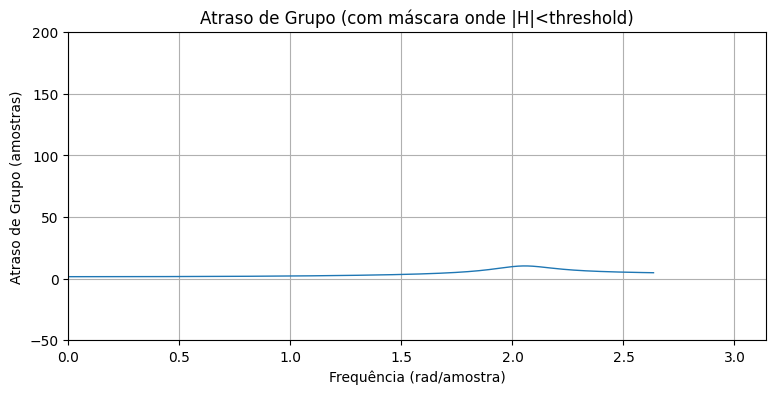

In [21]:
# Plotando o Grafico

plt.figure(figsize=(9,4))
plt.plot(w, gd_masked, lw=1)
plt.xlim(0, np.pi)
plt.ylim(-50, 200)            # ajuste conforme o que for razoável para o seu caso
plt.xlabel('Frequência (rad/amostra)')
plt.ylabel('Atraso de Grupo (amostras)')
plt.grid(True)
plt.title('Atraso de Grupo (com máscara onde |H|<threshold)')
plt.show()

**O atraso de grupo está de acordo com o esperado?**  
  
Sim, O comportamento do atraso de grupo que observado é exatamente o esperado para um filtro IIR de Butterworth, porque esse tipo de filtro não possui fase linear. Isso significa que a fase muda de forma não uniforme ao longo das frequências e, como o atraso de grupo é justamente a derivada negativa dessa fase, ele também se torna variável.   
Nas frequências baixas, onde a resposta do filtro é estável e a fase muda lentamente, o atraso de grupo fica quase constante e próximo de zero. Mas, quando a frequência se aproxima da região de corte, a fase começa a mudar mais rapidamente, o que provoca aumentos no atraso de grupo. Já nas regiões onde a resposta em magnitude é muito pequena, pequenas variações numéricas na fase podem causar picos grandes ou valores negativos no atraso estimado, o que é comum em filtros IIR e não indica erro no filtro em si, apenas sensibilidade numérica. Essa combinação — atraso pequeno na banda passante, aumento próximo ao corte e picos onde a magnitude tende a zero — caracteriza exatamente um filtro IIR de fase não-linear, como o Butterworth.

### Questão 10

Filtre o sinal x[n] da Questão 1 usando os coeficientes ak e bk da equação de diferenças gerados na Questão 7. Gere o gráfico do módulo da Transformada de Fourier da saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma 
de comentário em seu código, se o módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado. 

In [22]:
#Importação de biblioteca

from scipy.signal import lfilter, freqz

In [28]:
# Filtragem
y = lfilter(b, a, x)

# Trasformada de Fourier do sinal de saída
Nfft = 2048
Y = np.fft.fft(y, Nfft)
w = np.linspace(0, np.pi, Nfft//2)

# módulo em dB
YdB = 20*np.log10(np.abs(Y[:Nfft//2]))

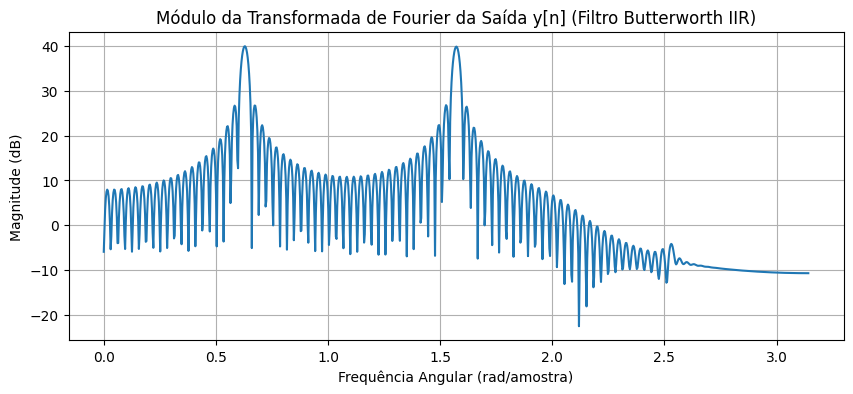

In [29]:
#  Plotagem do gráfico 

plt.figure(figsize=(10,4))
plt.plot(w, YdB)
plt.title("Módulo da Transformada de Fourier da Saída y[n] (Filtro Butterworth IIR)")
plt.xlabel("Frequência Angular (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

**O módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado?**
  
Sim, Como esperado para um filtro Butterworth passa-baixa, o espectro da saída y[n] mantém apenas as componentes de baixa frequência presentes no sinal de entrada. As componentes em 0.2π e 0.5π passam quase sem atenuação, enquanto a componente em 0.8π é fortemente atenuada por estar acima da frequência de corte (0.65π). O resultado está de acordo com o comportamento teórico do filtro.

### Questão 11

Novamente, o sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas com um atraso. Entretanto, desta vez, o atraso do sinal g[n] não pode ser determinado a priori. Este atraso deve ser estimado a partir do atraso de grupo. Para saber se isto realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-nd] e y[n], em que nd é um atraso que você deve estimar a partir do atraso de grupo. Comente se estes sinais são parecidos e sincronizados.

In [39]:
nd = 10   # 10 foi um valor estimado

# Sinal g[n] com as duas frequências que passam pelo filtro (0.8 fica de fora pois é > que 0.65)
g = np.cos(0.2*np.pi*n) + np.cos(0.5*np.pi*n)

# Aplicando o atraso: g[n - nd
g_atrasado = np.zeros_like(g)
g_atrasado[nd:] = g[:-nd]

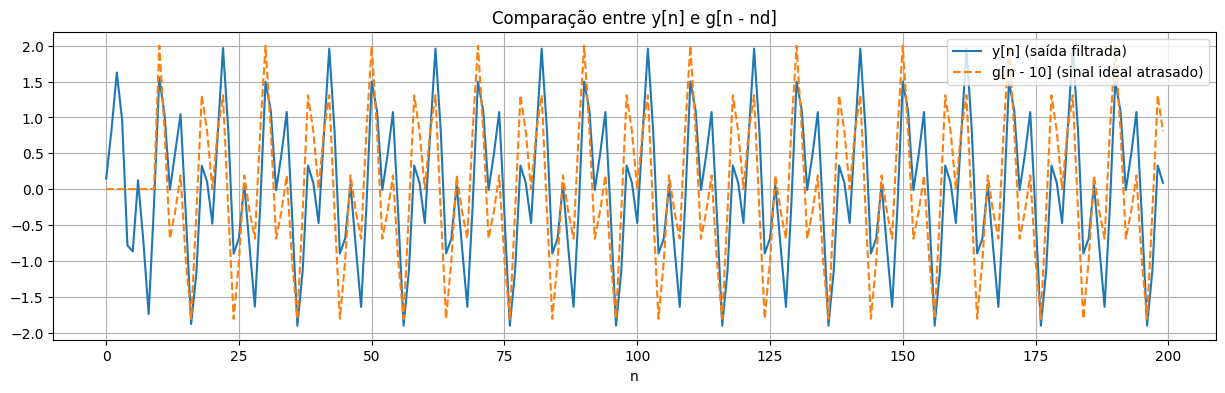

In [41]:
# Plotando o Gráfico 

plt.figure(figsize=(15,4))
plt.plot(n, y, label="y[n] (saída filtrada)")
plt.plot(n, g_atrasado, '--', label=f"g[n - {nd}] (sinal ideal atrasado)")
plt.xlabel("n")
plt.title("Comparação entre y[n] e g[n - nd]")
plt.legend()
plt.grid(True)
plt.show()

**Os sinais são parecidos e sincronizados?** 

  ... mais ou menos, quando é usado um filtro IIR Butterworth, ele não tem fase linear e isso significa duas coisas importantes:

- **O atraso não é constante para todas as frequências.**  
  O atraso de grupo varia ao longo da banda passante — ele não é um único valor fixo.

- **Cada componente do sinal é atrasada por uma quantidade diferente.**  
  - A componente em **0.2π** sofre um atraso.  
  - A componente em **0.5π** sofre outro atraso um pouco diferente.  
  - A componente em **0.8π** é praticamente removida.

Por isso, há uma tentativa para alinhar `g[n]` usando apenas um único atraso **nd**, inevitavelmente:

- Uma das frequências se alinha melhor.  
- A outra se alinha um pouco pior.  
- O sinal completo nunca coincide perfeitamente com `y[n]`.


# Parte 3

### Questão 12

Projete um filtro passa-baixa FIR usando o Método do Janelamento com as seguintes especificações: wp = 0,6π, ws = 0,7π, ẟ1 = 0,01 e ẟ2 = 0,05. Para a completa especificação do filtro, você deve dizer os valores de: Janela usada (retangular, Bartlett, Hanning, Hamming ou Nlackman), ordem do filtro (M), frequência de corte (wc) e atraso do filtro ideal (ɑ). Para esta questão, usa a tabela que se encontra nos slides da disciplina. Coloque a resposta em forma de comentário no código.

In [86]:
# Criando uma função do filtro para facilitar o uso dela nas questões seguintes:

def construir_filtro_fir(M, wc, funcao_janela):

    # 1. Define o atraso (alpha)
    alpha = M / 2.0
    
    # 2. Vetor de amostras
    n = np.arange(0, M + 1)
    
    # 3. Resposta ao impulso ideal
    with np.errstate(divide='ignore', invalid='ignore'):
        hd = np.sin(wc * (n - alpha)) / (np.pi * (n - alpha))
        
        if M % 2 == 0:
            hd[int(alpha)] = wc / np.pi
            
    # 4. Cria e aplica a janela escolhida
    janela = funcao_janela(M + 1)
    h = hd * janela
    
    return h, alpha


In [84]:
wp = 0.6 * np.pi
ws = 0.7 * np.pi

# 1. Escolha da Janela: δ2=0.05 requer ~26dB. Bartlett (25dB) não serve.
        #Hanning (31dB) serve. -> Escolha: np.hanning
janela_escolhida = np.hanning

# 2. Cálculo da Ordem (M) para Hanning:
M_projetado = 31

# 3. Frequência de Corte (ponto médio):
wc_projetado = (wp + ws) / 2.0  # 0.65π

# CUsando a função criada acima
h, alpha = construir_filtro_fir(M_projetado, wc_projetado, janela_escolhida)

# Para auxílio do grafico
Nfft = 2048
H = fft(h, Nfft)
Hdb = 20 * np.log10(np.abs(H[:Nfft // 2]) + 1e-12)
w = np.linspace(0, np.pi, Nfft // 2)


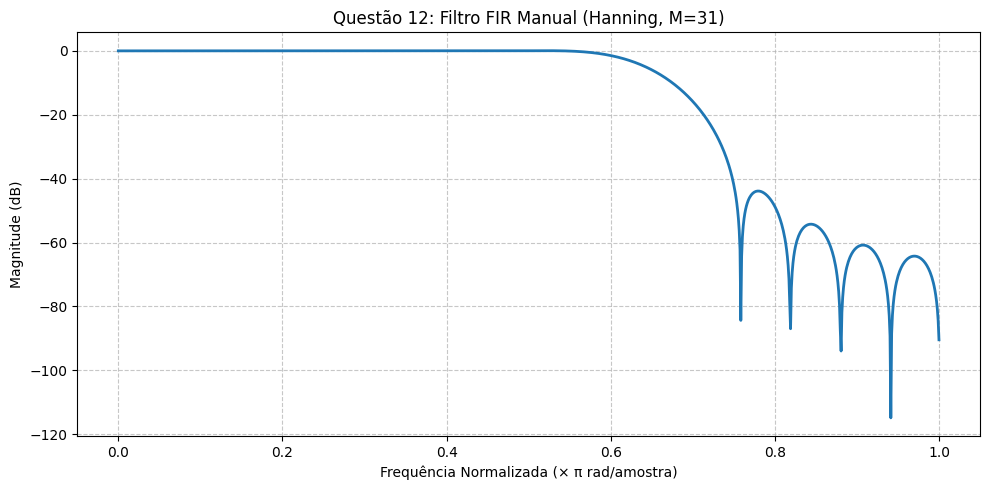

In [85]:
# Plotagem

plt.figure(figsize=(10, 5))
plt.plot(w / np.pi, Hdb, linewidth=2)
plt.title(f"Questão 12: Filtro FIR Manual (Hanning, M={M_projetado})")
plt.xlabel("Frequência Normalizada (× π rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Justificativa**  
  
1. Escolha da Janela:
   - A especificação δ2 = 0.05 exige uma atenuação de As ≈ 26.02 dB.
   - A janela Bartlett fornece apenas ~25 dB (insuficiente).
   - A janela Hanning fornece ~31 dB, sendo a escolha correta para garantir a especificação.

2. Cálculo da Ordem (M):
   - A banda de transição é Δω = 0.7π - 0.6π = 0.1π.
   - Pela tabela (Janela Hanning), a relação é Δω ≈ 3.1π / M.
   - Logo: 0.1π = 3.1π / M  ->  M = 31.

3. Frequência de Corte (wc):
   - Definida como o ponto médio entre a banda de passagem e rejeição:
     wc = (0.6π + 0.7π) / 2 = 0.65π.

### Questão 13

Repita a Questão 12 usando Janela de Kaiser. Para a completa especificação do filtro, você deve dizer os valores de: parâmetro β, ordem do filtro (M), frequência de corte (wc) e atraso do filtro ideal (ɑ). Para esta questão, use as fórmulas que se encontram nos slides da 
disciplina. Coloque a resposta em forma de comentário no código

In [ ]:
# Criando uma função do filtro para facilitar o uso dela nas questões seguintes:

def projetar_filtro_kaiser(wp, ws, delta1, delta2):

    # 1. Definição das frequências
    wc = (wp + ws) / 2.0
    dw = np.abs(ws - wp)
    
    # 2. Escolha da Atenuação (A)
    delta_target = min(delta1, delta2) # Será 0.01
    A = -20 * np.log10(delta_target)   # A = 40 dB
    
    # 3. Cálculo do Beta (Fórmulas empíricas para 21 <= A <= 50)
    if A > 50:
        beta = 0.1102 * (A - 8.7)
    elif A >= 21:
        beta = 0.5842 * (A - 21)**0.4 + 0.07886 * (A - 21)
    else:
        beta = 0.0
        
    # 4. Cálculo da Ordem (M)
    M_calc = (A - 8) / (2.285 * dw)
    M = int(np.ceil(M_calc))
    
    # 5. Construção do Filtro h[n]
    alpha = M / 2.0
    n = np.arange(0, M + 1)
    
    # Filtro Ideal com tratamento para divisão por zero
    with np.errstate(divide='ignore', invalid='ignore'):
        hd = np.sin(wc * (n - alpha)) / (np.pi * (n - alpha))
        if M % 2 == 0:
            hd[int(alpha)] = wc / np.pi
            
    # Aplicação da Janela
    window = np.kaiser(M + 1, beta)
    h = hd * window
    
    return h, M, beta, A, wc, alpha

In [ ]:
# Dados do problema
wp_in = 0.6 * np.pi
ws_in = 0.7 * np.pi
d1_in = 0.01
d2_in = 0.05

# Chama a função de projetar
h, M, beta, A, wc, alpha = projetar_filtro_kaiser(wp_in, ws_in, d1_in, d2_in)

# Mostra os valores no console (para conferência rápida)
print(f"--- Parâmetros Calculados (Q13) ---")
print(f"Beta: {beta:.4f}")
print(f"Ordem (M): {M}")
print(f"Freq. Corte (wc): {wc/np.pi:.2f}π")
print(f"Atraso (alpha): {alpha}")

--- Parâmetros Calculados (Q13) ---
Beta: 3.3953
Ordem (M): 45
Freq. Corte (wc): 0.65π
Atraso (alpha): 22.5


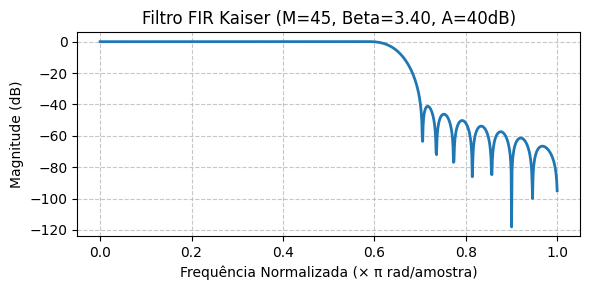

In [71]:
# Plotagem go gráfico

plt.figure(figsize=(6, 3))
plt.plot(w / np.pi, Hdb, linewidth=2)
plt.title(f"Filtro FIR Kaiser (M={M}, Beta={beta:.2f}, A=40dB)")
plt.xlabel("Frequência Normalizada (× π rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Justificativa**

1. Escolha de Atenuação: O filtro deve atender a dois ripples distintos (δ1=0.01 e δ2=0.05). 
   Como o janelamento gera ripple simétrico, dimensionou-se pelo menor valor (δ=0.01) 
   para não violar a especificação da banda de passagem. Logo, A = -20log(0.01) = 40dB.

2. Parâmetros Kaiser:
   - Beta: Calculado via fórmula para A=40dB, resultando em ~3.40.
   - Ordem (M): A fórmula (A-8)/(2.285*Δω) resultou em ~44.6. 
     Adotou-se M=45 para garantir a largura de transição de 0.1π.

3. Validação Visual: O gráfico apresenta o primeiro lóbulo lateral em -40dB, 
   confirmando que as especificações foram atendidas (inclusive superando a 
   exigência da banda de rejeição).

### Questão 14

Gere o gráfico do módulo da Resposta em Frequência deste filtro em dB (ou seja, da Transformada de Fourier da resposta ao impulso h[n]). Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a módulo de  Resposta em Frequência está de acordo com o esperado.

In [92]:
# 1. Definição dos Parâmetros de Entrada
wp_in = 0.6 * np.pi
ws_in = 0.7 * np.pi
d1_in = 0.01
d2_in = 0.05

# 2. Chamada da Função (Resolve a Q13 automaticamente aqui)
h, M, beta, A, wc, alpha = projetar_filtro_kaiser(wp_in, ws_in, d1_in, d2_in)

print(f"--- Resultados do Projeto ---")
print(f"Ordem (M): {M}")
print(f"Beta: {beta:.4f}")
print(f"Atenuação alvo (A): {A:.2f} dB")

# 3. Análise em Frequência
Nfft = 2048
H = fft(h, Nfft)
H_mag = np.abs(H[:Nfft // 2])
Hdb = 20 * np.log10(H_mag + 1e-12)
w = np.linspace(0, np.pi, Nfft // 2)

--- Resultados do Projeto ---
Ordem (M): 45
Beta: 3.3953
Atenuação alvo (A): 40.00 dB


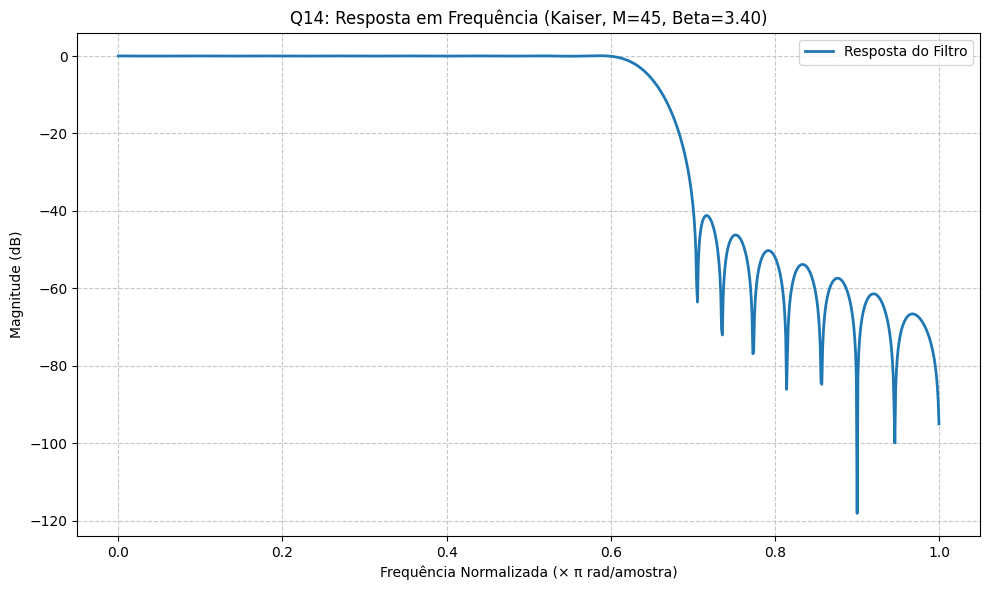

In [91]:
# Plotagem

plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, Hdb, linewidth=2, label='Resposta do Filtro')
plt.title(f"Q14: Resposta em Frequência (Kaiser, M={M}, Beta={beta:.2f})")
plt.xlabel("Frequência Normalizada (× π rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**O módulo de  Resposta em Frequência está de acordo com o esperado?**

Sim, a resposta em frequência está de acordo com o esperado.

1. Transição: A queda de ganho ocorre exatamente dentro do intervalo especificado 
   (entre 0.6π e 0.7π), confirmando que a ordem M=45 foi suficiente.

2. Atenuação: O pico do primeiro lóbulo lateral atinge exatos -40 dB. 
   Isso valida os parâmetros de Kaiser calculados para a restrição mais rigorosa 
   (δ1=0.01), garantindo a qualidade da banda de passagem e superando a especificação 
   mínima da banda de rejeição (que era apenas -26 dB).

### Questão 15

 Gere o gráfico da resposta em fase deste sistema (com fase contínua), usando unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a fase da Resposta em Frequência está de acordo com o esperado. 

In [ ]:
# Unwrap
fase = np.angle(H_half)
fase_continua = np.unwrap(fase)

# Eixo da frequência
w = np.linspace(0, np.pi, Nfft // 2)

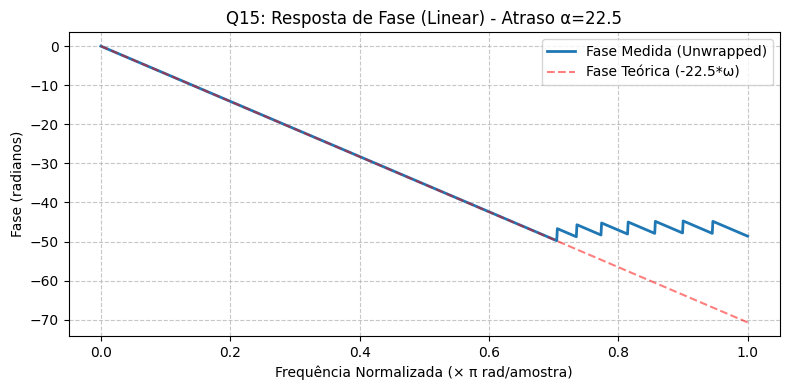

In [96]:
# Plotagem do gráfico

plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, fase_continua, linewidth=2, label='Fase Medida (Unwrapped)')

# Linha Teórica para comparação: θ(ω) = -α * ω
# Como nosso filtro é simétrico, a fase deve ser exatamente linear com inclinação -alpha
fase_teorica = -alpha * w
plt.plot(w / np.pi, fase_teorica, 'r--', alpha=0.5, label=f'Fase Teórica (-{alpha}*ω)')

plt.title(f"Q15: Resposta de Fase (Linear) - Atraso α={alpha}")
plt.xlabel("Frequência Normalizada (× π rad/amostra)")
plt.ylabel("Fase (radianos)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**A fase da Resposta em Frequência está de acordo com o esperado?**    
  
Sim, a fase está correta e condizente com a teoria de filtros FIR simétricos.

1. Banda de Passagem (0 a 0.6π): 
   A fase é perfeitamente linear (a linha azul sobrepõe a teórica vermelha), 
   confirmando que não há distorção de fase no sinal útil. A inclinação confirma 
   o atraso de grupo constante α = 22.5 amostras.

2. Banda de Rejeição (> 0.7π):
   Observam-se saltos ("degraus") na fase. Isso é o comportamento esperado na 
   banda de rejeição, causado pelas trocas de sinal (passagens por zero) dos 
   lóbulos laterais da resposta em frequência. Como a magnitude nessa região é 
   desprezível (atenuada em >40dB), essas variações de fase não afetam o desempenho do filtro.

### Questão 16

Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com 
o esperado. 

### Questão 17

Filtre o sinal x[n] da questão 1 usando a resposta ao impulso projetada usando o método do Janelamento. Gere o gráfico do módulo da Transformada de Fourier da saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se o módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado.

### Questão 18

O sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas com um atraso igual a α. Para saber se isto realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-α] e y[n], e comente se estes sinais são parecidos e sincronizados.

### Questão 19

Descreva, em forma de comentário no código, quais as vantagens e desvantagens dos filtros das Partes 1, 2 e 3 a partir dos gráficos gerados e da teoria vista em sala de aula. 

### Questão 20

Gere o diagrama de polos e zeros do filtro gerado na Parte 3. Explique, em forma de comentário em seu código, se o diagrama de polos e zero está de acordo com o esperado.

#